# Business Scenario:


AAVAIL has been experimenting with à la carte approach for the subsription based models. The company has carried out the experiment outside US and now the Client wants a Revenue Prediction Model based on the data collected in the Previous Years.   The Data Collected has the below features<br/>                                                                                 <b>country</b>
<br/>
<b>customer_id</b> 
<br/>
<b>day</b> 
<br/>
<b>invoice</b>
<br/>
<b>month</b> 
<br/>
<b>price</b> 
<br/>
<b>stream_id</b> 
<br/>
<b>times_viewed</b> 
<br/>
<b>year</b> 
<br/>
<b>invoice_date</b> 
<br/>

#  Data Required

The Problem Statement is to pridict the revenue of the next for any given country from the various columns present in the many jason files present below are the columns which seems related
<b>country</b>
<br/>
<b>day</b> 
<br/>
<b>invoice</b>
<br/>
<b>month</b> 
<br/>
<b>price</b> 
<br/>
<b>stream_id</b> 
<br/>
<b>times_viewed</b> 
<br/>
<b>year</b> 
<br/>
<b>invoice_date</b> 
<br/>

# Python Script to Load Data

In [1]:
# Importing all the required libraries for the Project
import cslib ## new code used in the solution hints all the functions are generix fr loading the data and all
import pandas as pd
import os
import numpy as np
import pingouin
import DataIngestion # Script forfetching the data from Json files

In [2]:
# importing the libraries for data visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

SMALL_SIZE = 8
MEDIUM_SIZE = 10
LARGE_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

In [3]:
df = pd.DataFrame()

In [4]:
print(os.chdir('C:\\Users\\GauravSaxena\\Downloads\\Capstone_Project_Final\\data\\cs-train'))
print("loading the files")
df = DataIngestion.readJSONData(os.getcwd())
print("Files Finally getting loaded")

None
loading the files
Files Finally getting loaded


In [5]:
# data got loaded successfully
# checking the Data Frame 
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


#  Data Processing

In [6]:
#### Checking for Missing Values
print("\nMissing Value Summary\n{}".format("-"*35))
print(df.isnull().sum(axis = 0))


Missing Value Summary
-----------------------------------
country              0
customer_id     189762
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64


### Observation regarding Missing Data
From the above result it is clearly observed that the Customer Id Fiels is having missing values hence we utilizing the customer Id Field is difficult hence the same can be removed from the inputset

In [7]:
col_names = list(df.columns)
del col_names[1]
print(col_names)

['country', 'day', 'invoice', 'month', 'price', 'stream_id', 'times_viewed', 'year', 'invoice_date']


In [8]:
# Creating Summary Tables using the DataFrame grouping Price by Country
df_Final = df[col_names]
df_Country=df_Final.pivot_table(index=['country'], values=['price'], aggfunc='sum').round(2)
df_Country = df_Country.sort_values('price', ascending=False)
# As apart of case strudy we will be considering only top 10 countries which have the highest revernue. Below are identified top 10 countries
df_top10 = df_Country.head(10)

In [9]:
cntList = list(df_top10.index)
cntList

['United Kingdom',
 'EIRE',
 'Germany',
 'France',
 'Norway',
 'Spain',
 'Hong Kong',
 'Portugal',
 'Singapore',
 'Netherlands']

#  Data Summary

The below summary tables provides the year wise revenue(aggregate Price of each country

In [10]:
df_T10 = df_Final[(df_Final['country'].isin (cntList))]
df_group=df_T10.pivot_table(index=['country','year'], values=['price'], aggfunc='sum').round(2)
df_group

price
country        year            
EIRE           2017     4433.09
               2018    74398.30
               2019    28237.82
France         2017     1200.34
               2018    24538.34
               2019    14826.46
Germany        2017     1525.79
               2018    30554.33
               2019    17191.70
Hong Kong      2018     8715.38
               2019     5737.19
Netherlands    2017      384.26
               2018     8948.11
               2019     2990.43
Norway         2017      123.28
               2018    34716.40
               2019     3655.07
Portugal       2017      294.35
               2018     4292.26
               2019     8942.06
Singapore      2018      372.51
               2019    12803.41
Spain          2017      845.22
               2018     7311.56
               2019     7884.21
United Kingdom 2017   187241.07
               2018  2272135.64
               2019  1062136.79

# Visualization of the revenue

Text(0, 0.5, 'Revenue')

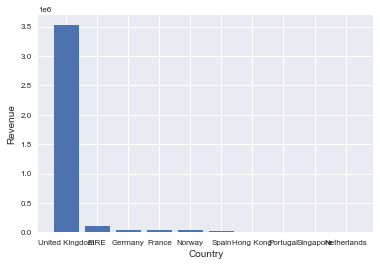

In [12]:
plt.bar(df_top10.index, df_top10['price'].values)
plt.xlabel('Country')
plt.ylabel('Revenue')

United Kingdon has the revenue many folds from the other Countries lets check for the revenues for the Month Wise

In [13]:
df_UK = df_Final[(df_Final.country == "United Kingdom")]
pd.unique(df_UK['month'])

array([11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [14]:
# checling the revenue of the United Kingdom monthwise
df_UK_Month=df_UK.pivot_table(index=['month'], values=['price'], aggfunc='sum').round(2)
df_UK_Month

,price
month,
1,329101.28
2,220195.23
3,350347.39
4,233579.17
5,292719.10
6,387342.50
7,269422.27
8,135892.28
9,204623.94


Text(0, 0.5, 'Revenue')

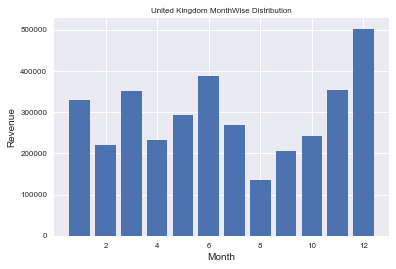

In [15]:
plt.bar(df_UK_Month.index, df_UK_Month['price'].values)
plt.xlabel('Month')
plt.title('United Kingdom MonthWise Distribution')
plt.ylabel('Revenue')

In [16]:
#Checking the distribution of the revenue over the months
df_MONTH_ALL=df_Final.pivot_table(index=['month'], values=['price'], aggfunc='sum').round(2)
df_MONTH_ALL

,price
month,
1,371791.05
2,244822.31
3,419001.43
4,269208.79
5,332714.92
6,419026.69
7,300635.17
8,156605.00
9,222500.98


Text(0, 0.5, 'Revenue')

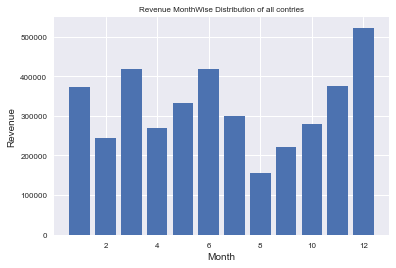

In [17]:
plt.bar(df_MONTH_ALL.index, df_MONTH_ALL['price'].values)
plt.xlabel('Month')
plt.title('Revenue MonthWise Distribution of all contries')
plt.ylabel('Revenue')

#### Above Graph clearly shows that the Revenue for the Month of November and December were the highest for all countries

In [18]:
pd.unique(df_T10['country'])

array(['United Kingdom', 'France', 'EIRE', 'Germany', 'Portugal',
       'Netherlands', 'Spain', 'Norway', 'Hong Kong', 'Singapore'],
      dtype=object)

Text(0, 0.5, 'Revenue')

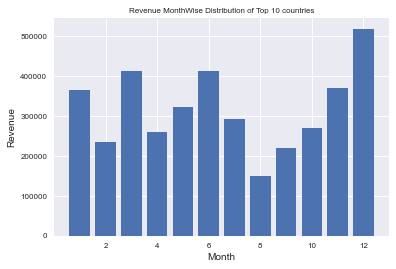

In [19]:
df_MONTH_T10=df_T10.pivot_table(index=['month'], values=['price'], aggfunc='sum').round(2)
plt.bar(df_MONTH_T10.index, df_MONTH_T10['price'].values)
plt.xlabel('Month')
plt.title('Revenue MonthWise Distribution of Top 10 countries')
plt.ylabel('Revenue')

# Hypothesis Testing

In [20]:
test_results = pingouin.pairwise_ttests(data=df_UK, dv='price', between='year', alpha=0.1, correction=True)
test_results.head()

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,year,2017,2018,False,True,-1.354378,468681.063789,two-sided,0.175617,0.014,-0.002239
1,year,2017,2019,False,True,-1.360465,268024.051771,two-sided,0.173684,0.015,-0.003413
2,year,2018,2019,False,True,-0.038126,597010.510709,two-sided,0.969588,0.003,-0.000086


# PART 2 CAPSTONE PROJECT

## Model Approaches

As we will be exploring the TimeSeries Analysis for the first time hence will be sticking on the Supervised Learning Approach mentioned in the solution hints will try to change the hyperparameters

In [60]:
#importing the necessary header files
import time,os,re,csv,sys,uuid,joblib
from datetime import date
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from cslib import fetch_ts, engineer_features
MODEL_DIR = "models"
MODEL_VERSION = 0.1
MODEL_VERSION_NOTE = "supervised learing model for time-series"
from logger import *

### Model Definition1 using RandomRegressor

In [61]:
def _model_train(df,tag,test=False):
    """
    example funtion to train model
    
    The 'test' flag when set to 'True':
        (1) subsets the data and serializes a test version
        (2) specifies that the use of the 'test' log file 

    """


    ## start timer for runtime
    time_start = time.time()
    
    X,y,dates = engineer_features(df)

    if test:
        n_samples = int(np.round(0.3 * X.shape[0]))
        subset_indices = np.random.choice(np.arange(X.shape[0]),n_samples,
                                          replace=False).astype(int)
        mask = np.in1d(np.arange(y.size),subset_indices)
        y=y[mask]
        X=X[mask]
        dates=dates[mask]
        
    ## Perform a train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                        shuffle=True, random_state=42)
    ## train a random forest model
    param_grid_rf = {
    'rf__criterion': ['mse','mae'],
    'rf__n_estimators': [10,15,20,25]
    }

    pipe_rf = Pipeline(steps=[('scaler', StandardScaler()),
                              ('rf', RandomForestRegressor())])
    
    grid = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, iid=False, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    eval_rmse =  round(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    ## retrain using all data
    grid.fit(X, y)
    model_name = re.sub("\.","_",str(MODEL_VERSION))
    if test:
        saved_model = os.path.join(MODEL_DIR,
                                   "test-{}-{}.joblib".format(tag,model_name))
        print("... saving test version of model: {}".format(saved_model))
    else:
        saved_model = os.path.join(MODEL_DIR,
                                   "sl-{}-{}.joblib".format(tag,model_name))
        print("... saving model: {}".format(saved_model))
        
    joblib.dump(grid,saved_model)

    m, s = divmod(time.time()-time_start, 60)
    h, m = divmod(m, 60)
    runtime = "%03d:%02d:%02d"%(h, m, s)
    update_train_log(tag,(str(dates[0]),str(dates[-1])),{'rmse':eval_rmse},runtime,MODEL_VERSION, MODEL_VERSION_NOTE,test=True)

In [62]:
def model_train(data_dir,test=False):
    """
    funtion to train model given a df
    
    'mode' -  can be used to subset data essentially simulating a train
    """
    
    if not os.path.isdir(MODEL_DIR):
        os.mkdir(MODEL_DIR)

    if test:
        print("... test flag on")
        print("...... subseting data")
        print("...... subseting countries")
        
    ## fetch time-series formatted data
    ts_data = fetch_ts(data_dir)

    ## train a different model for each data sets
    for country,df in ts_data.items():
        
        if test and country not in ['all','united_kingdom']:
            continue
        
        _model_train(df,country,test=test)

In [63]:
def model_predict(country,year,month,day,all_models=None,test=False):
    """
    example funtion to predict from model
    """

    ## start timer for runtime
    time_start = time.time()

    ## load model if needed
    if not all_models:
        all_data,all_models = model_load(training=False)
    
    ## input checks
    if country not in all_models.keys():
        raise Exception("ERROR (model_predict) - model for country '{}' could not be found".format(country))

    for d in [year,month,day]:
        if re.search("\D",d):
            raise Exception("ERROR (model_predict) - invalid year, month or day")
    
    ## load data
    model = all_models[country]
    data = all_data[country]

    ## check date
    target_date = "{}-{}-{}".format(year,str(month).zfill(2),str(day).zfill(2))
    print(target_date)

    if target_date not in data['dates']:
        raise Exception("ERROR (model_predict) - date {} not in range {}-{}".format(target_date,
                                                                                    data['dates'][0],
                                                                                    data['dates'][-1]))
    date_indx = np.where(data['dates'] == target_date)[0][0]
    query = data['X'].iloc[[date_indx]]
    
    ## sainty check
    if data['dates'].shape[0] != data['X'].shape[0]:
        raise Exception("ERROR (model_predict) - dimensions mismatch")

    ## make prediction and gather data for log entry
    y_pred = model.predict(query)
    y_proba = None
    if 'predict_proba' in dir(model) and 'probability' in dir(model):
        if model.probability == True:
            y_proba = model.predict_proba(query)


    m, s = divmod(time.time()-time_start, 60)
    h, m = divmod(m, 60)
    runtime = "%03d:%02d:%02d"%(h, m, s)

    update_predict_log(country,y_pred,y_proba,target_date,
                       runtime, MODEL_VERSION, test=test)
    
    return({'y_pred':y_pred,'y_proba':y_proba})

In [64]:
def model_load(prefix='sl',data_dir=None,training=True):
    """
    example funtion to load model
    
    The prefix allows the loading of different models
    """

    if not data_dir:
        data_dir = os.path.join("..","cs-train")
    
    print(os.path)
    models = [f for f in os.listdir(os.path.join(".","models")) if re.search("sl",f)]

    if len(models) == 0:
        raise Exception("Models with prefix '{}' cannot be found did you train?".format(prefix))

    all_models = {}
    for model in models:
        all_models[re.split("-",model)[1]] = joblib.load(os.path.join(".","models",model))

    ## load data
    ts_data = fetch_ts(data_dir)
    all_data = {}
    for country, df in ts_data.items():
        X,y,dates = engineer_features(df,training=training)
        dates = np.array([str(d) for d in dates])
        all_data[country] = {"X":X,"y":y,"dates": dates}
        
    return(all_data, all_models)

In [65]:
print(os.chdir('C:\\Users\\GauravSaxena\\Downloads\\Capstone_Project_Final\\cs-train'))
model_train(os.getcwd(),test=False)

None
C:\Users\GauravSaxena\Downloads\Capstone_Project_Final\cs-train
... loading ts data from files


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-all-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-eire-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-france-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-germany-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-hong_kong-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-netherlands-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-norway-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-portugal-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-singapore-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-spain-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


... saving model: models\sl-united_kingdom-0_1.joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [66]:
### Prediction using the Hind Sol Regressor
os.chdir('C:\\Users\\GauravSaxena\\Downloads\\Capstone_Project_Final\\cs-train');
country='france'
year='2019'
month='03'
day='05'
result = model_predict(country,year,month,day)
print(result)

<module 'ntpath' from 'C:\\ProgramData\\Anaconda3\\lib\\ntpath.py'>
C:\Users\GauravSaxena\Downloads\Capstone_Project_Final\cs-train
... loading ts data from files
2019-03-05
{'y_pred': array([3906.5008]), 'y_proba': None}


###  Model 2: ARIMA MODEL

In [29]:
from ModelGenericFunction import *
import fbprophet

### Time Series Analysis on a daily Basis

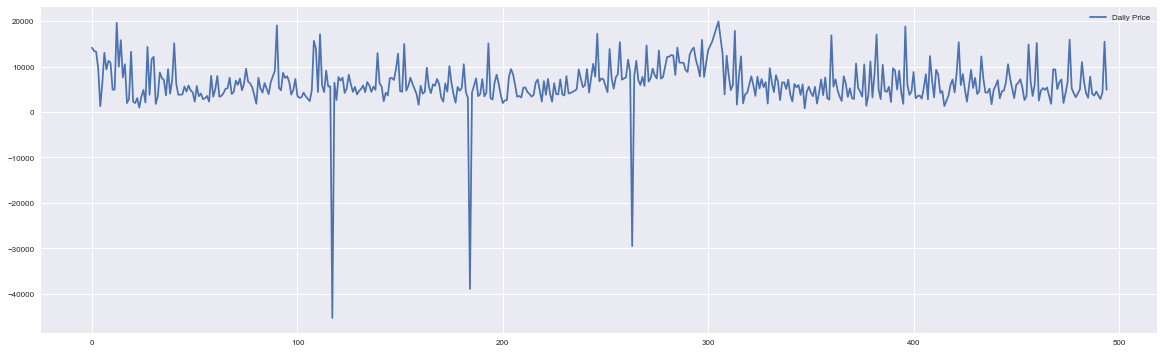

In [31]:
# checking statf a time-series on a daily basis
df_day = df_T10.groupby(['invoice_date']).agg({'times_viewed':'sum', 'price':'sum', 'country':'first',}).reset_index()
df_day = df_day[df_day['price']<=20000]

df_day['price'].plot(figsize=(20,6),label='Daily Price') #Eliminate price outliner for > 20000
plt.legend(loc='best')

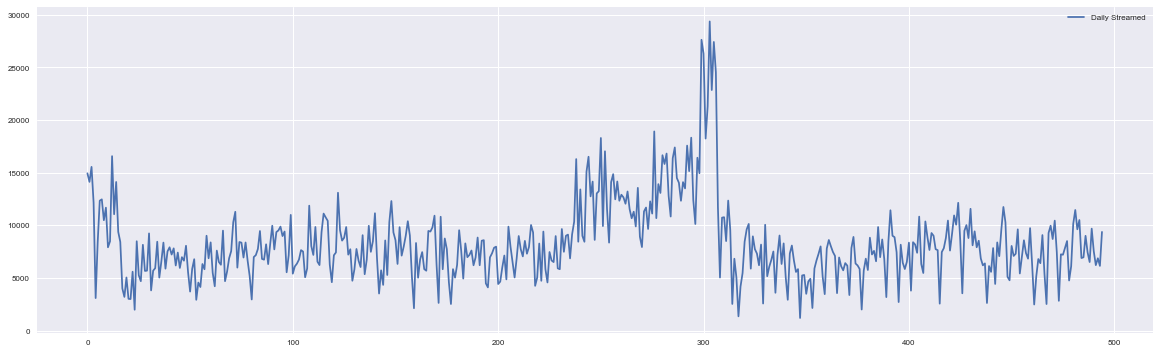

In [17]:
df_day = df_T10.groupby(['invoice_date']).agg({'times_viewed':'sum', 'price':'sum', 'country':'first',}).reset_index()
df_day['times_viewed'].plot(figsize=(20,6), label='Daily Streamed')
plt.legend(loc='best')

Stationarity Check for time Series

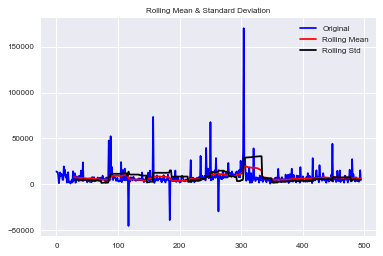

Result for Dickey-Fuller Test:
Test Statistic                -1.020589e+01
p-value                        5.806233e-18
#Lags Used                     2.000000e+00
Number of Observations Used    4.920000e+02
Critical value(1%)            -3.443711e+00
Critical value(5%)            -2.867432e+00
Critical value(10%)           -2.569908e+00
dtype: float64


In [18]:
rol_day=30
get_stationarity(df_day['price'],rol_day)

Fitting ARIMA time series model to untransformed data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, Futur

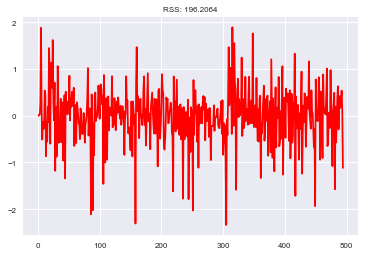

In [20]:
fit_ARIMA(df_day['price'],1)

Decomposing the time series into trend, seasonality and residuals

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


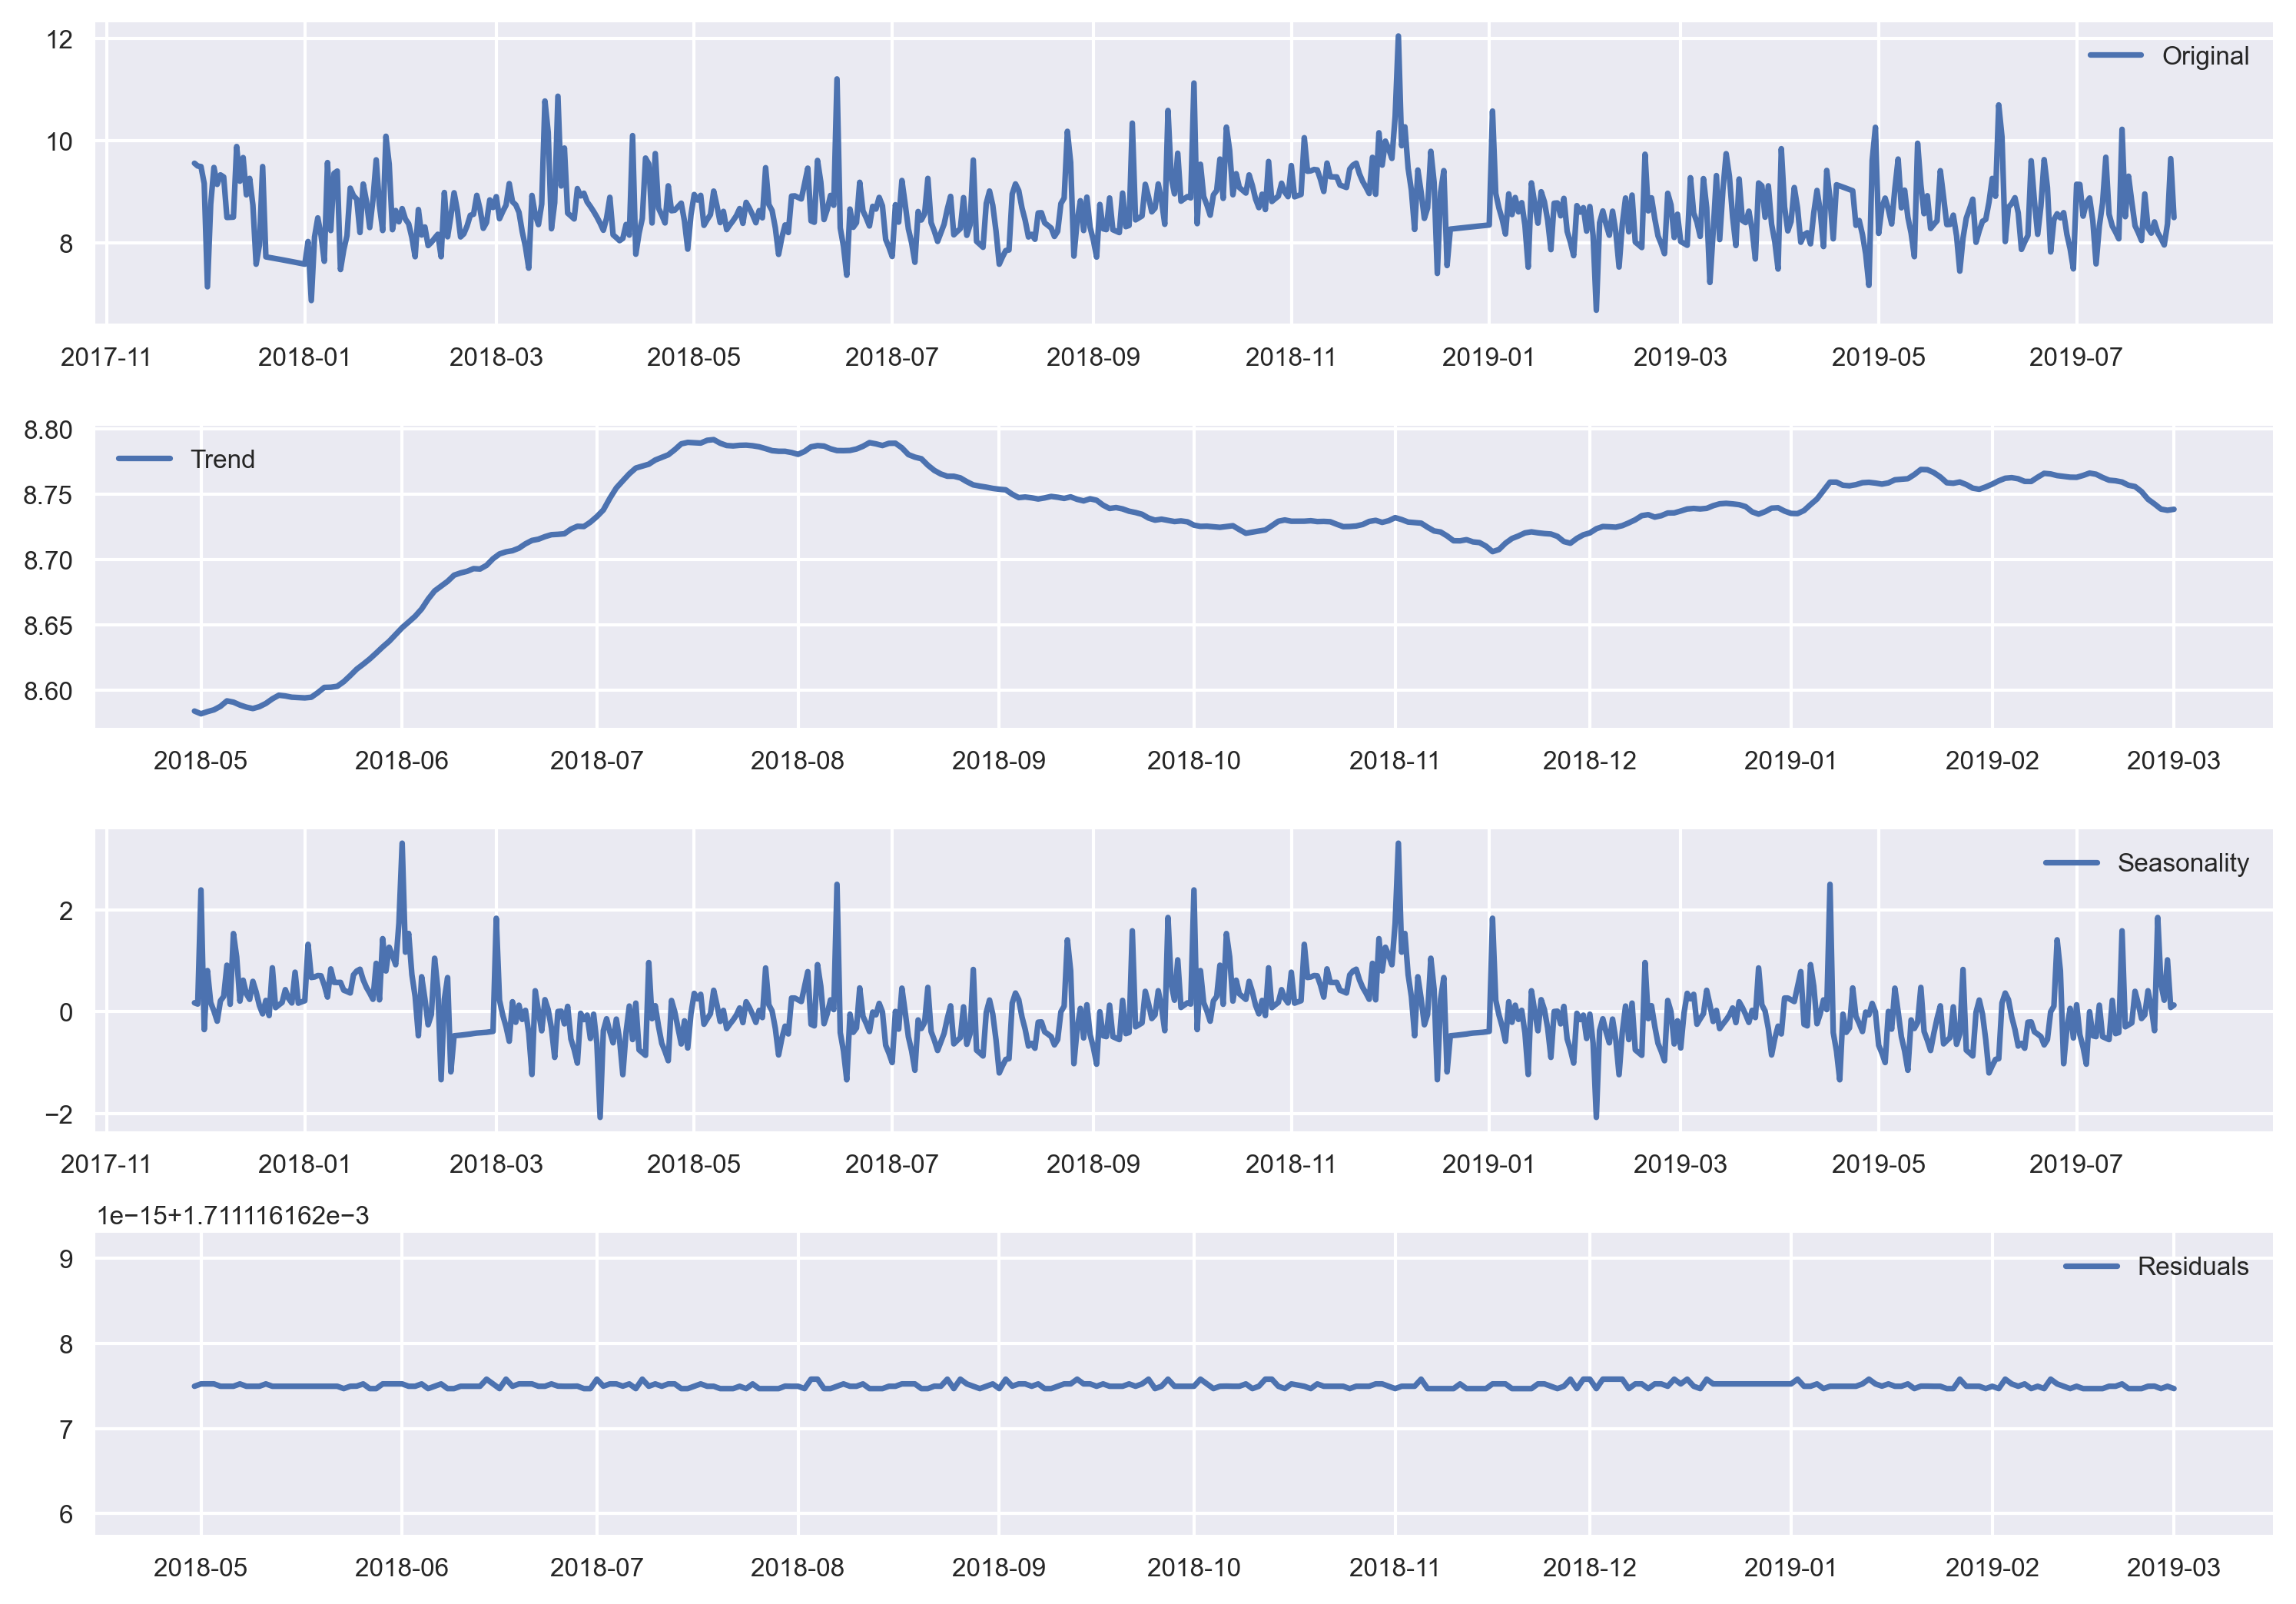

In [21]:
# Fill the missing datas to make data continuous and compatible with decompose function
ts = get_continuous(df_day,'1D')
## Decompose the data into trend, seasonality and residual
trend, seasonal, residual = get_decompose(ts, 'price',1)

It can be observed that log shifting by 30 days made the ARIMA much more accurate reducing the RSS

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

impor

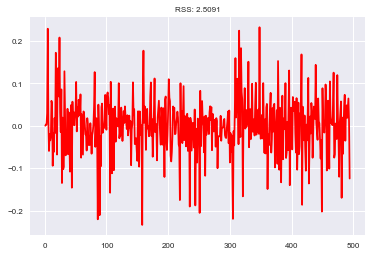

In [22]:
# ts_transformed = transform(ts_day, 30)
ts_transformed, ts_log_diff = log_shift(df_day['price'], 30)
fitted = fit_ARIMA(ts_transformed, 1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

impor

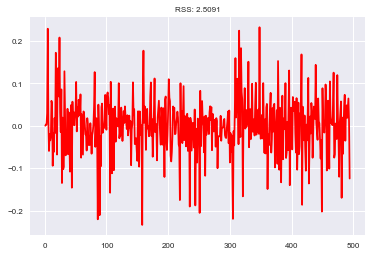

In [23]:
predictions = predict_ARIMA(ts_transformed,1)

In [24]:
predictions.head()

1   -0.000087
2    0.002800
3    0.002539
4    0.029362
5    0.228590
dtype: float64

In [25]:
predictions_ARIMA_diff_cumsum = predictions.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1   -0.000087
2    0.002713
3    0.005252
4    0.034614
5    0.263204
dtype: float64


In [26]:
predictions_ARIMA_log = pd.Series(ts_transformed.iloc[0], index=ts_transformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

0    9.556702
1    9.556615
2    9.559415
3    9.561954
4    9.591316
dtype: float64

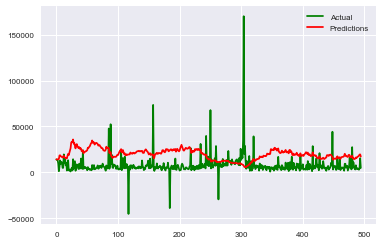

In [27]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_day['price'], color='green', label='Actual')
plt.plot(predictions_ARIMA, color='red', label='Predictions')
plt.legend(loc='best')

In [28]:
np.sqrt((predictions_ARIMA-df_day['price'])**2)/len(df_day['price'])

0      2.204836e-14
1      1.496939e+00
2      1.873700e+00
3      9.487357e+00
4      2.701785e+01
           ...     
490    2.792770e+01
491    3.093950e+01
492    3.043576e+01
493    8.313259e+00
494    2.504437e+01
Length: 495, dtype: float64